<a href="https://colab.research.google.com/github/Mrammoss/Prediction-of-Product-Sales/blob/main/Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

1. How many rows and columns?

In [6]:

df.shape


(8523, 12)

There are (8523) rows and (12) columns.

2. What are the datatypes of each variable?

These are the datatypes of all the current variables

In [7]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3. Are there any duplicates? If so, drop any duplicates.


Here it gives us a 0 for the sum of duplicates. Meaning there are only unique values

In [8]:
df.duplicated().sum()


0

4. Identify missing values.

Here we are missing (1463) float values for 'Item_Weight', and (2410) object values for 'Outlet_Size'

In [9]:

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Address the missing value by using a placeholder value.

I have replaced every missing value in 'Item_Weight' for a -1 here. The sum of missing values is 0, therefore there are no more missing values.

In [10]:

df['Item_Weight']=df['Item_Weight'].fillna(-1)
df['Item_Weight'].isna().sum()

0

I have replaced every missing value in 'Outlet_Size' with 'MISSING' here. The sum of missing values is 0, therefore there are no more missing values.

In [11]:


df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].isna().sum()

0

6. Confirm that there are no missing values after addressing them.

There are no values in the sum of missing values. There are now no missing values in the dataframe.

In [12]:

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Find and fix any incosistent categories of data.

In [13]:
#Displaying the values to see what is inconsistent.
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
# Correcting errors to have consistent names.
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({"LF":"Low Fat", "reg": "Regular", "low fat":"Low Fat"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8. For any numerical columns, obtain the summary statistics of each (min,max,mean) .

- Minimum

In [15]:

df.select_dtypes(include=['number']).min()

Item_Weight                    -1.00
Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
dtype: float64

- Maximum

In [16]:
df.select_dtypes(include=['number']).max()

Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

- Mean

In [17]:
df.select_dtypes(include=['number']).mean()

Item_Weight                    10.478936
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

### Imports for Plots



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Distributions of Numerical Features

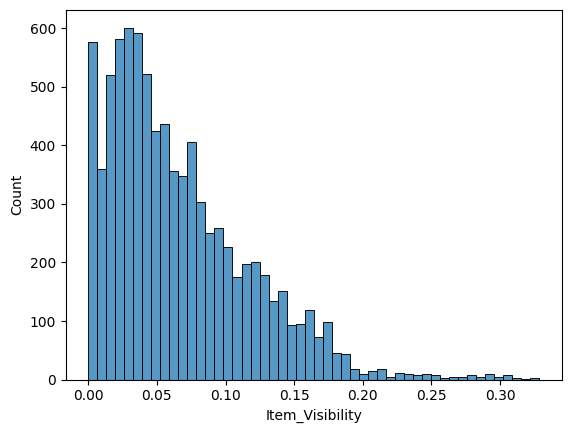

In [37]:
ax = sns.histplot(data=df, x='Item_Visibility')

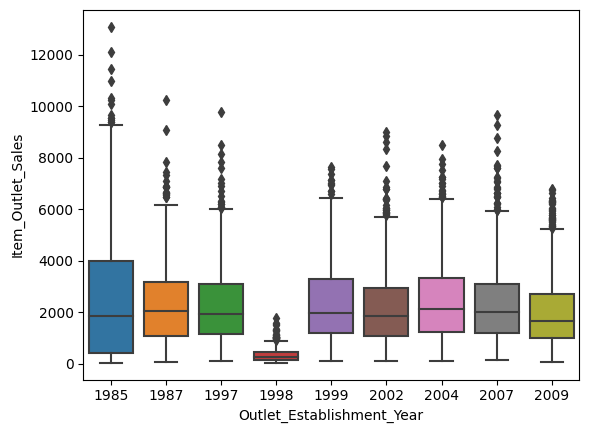

In [32]:
ax = sns.boxplot(data=df, x='Outlet_Establishment_Year', y= 'Item_Outlet_Sales')

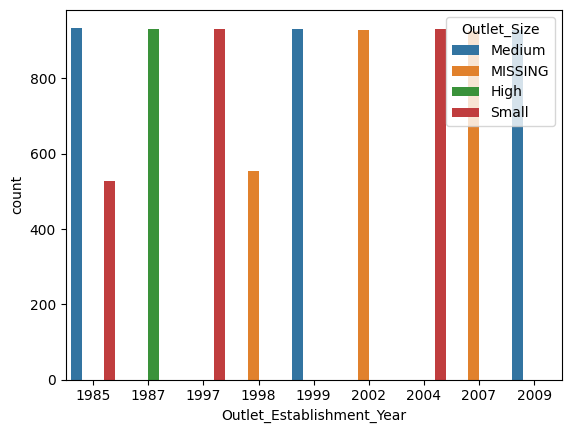

In [50]:
ax = sns.countplot(data=df, x='Outlet_Establishment_Year', hue='Outlet_Size')

<Axes: >

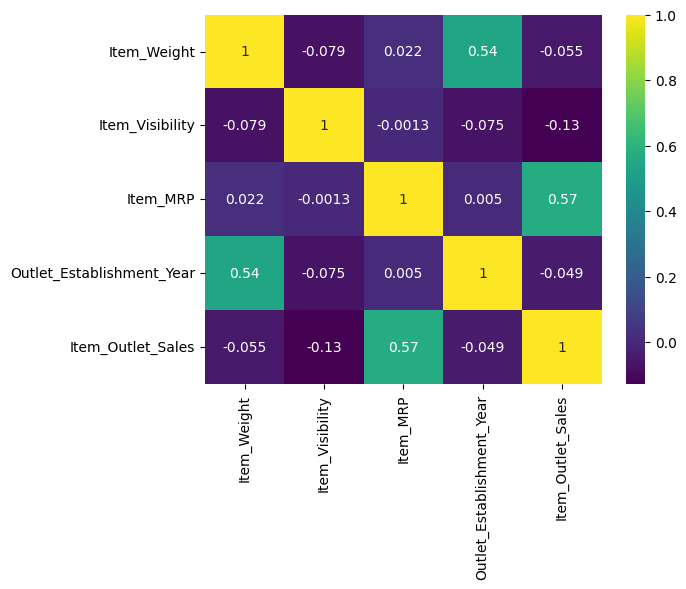

In [52]:
corr = df.corr(numeric_only = True)
corr.round(2)
sns.heatmap(corr, cmap='viridis', annot = True)